In [0]:
from keras import datasets
import pandas as pd
import numpy as np
from keras.utils import to_categorical

(xTrain, yTrain), (xTest, yTest) = datasets.cifar10.load_data()

names = ['airplane',
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck']

yTrain = to_categorical(yTrain)
yTest = to_categorical(yTest)

xTrain = xTrain.astype('float32')
xTest = xTest.astype('float32')

xTrain = xTrain/255.
xTest = xTest/255.

print(np.shape(xTrain))
print(np.shape(xTest))

print(np.shape(yTrain))
print(np.shape(yTest))

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


7363
bird
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


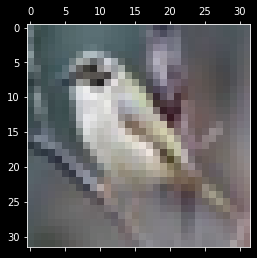

In [0]:
import matplotlib.pyplot as plt
from matplotlib import style
import random 
style.use(style.available[4])

x = random.randrange(0,10000)

print(x)
print(names[np.argmax(yTrain[x])])
print(yTrain[x])

plt.matshow(xTrain[x])

In [0]:
from keras import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.regularizers import l2
from keras.preprocessing.image import image

weightDecay = 1e-4

#model -- VGG-3 Blocks with dropouts
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', padding='same', kernel_regularizer=l2(weightDecay), input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation='relu', padding='same', kernel_regularizer=l2(weightDecay)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(weightDecay)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(weightDecay)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(weightDecay)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(weightDecay)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(weightDecay)))
model.add(Dense(10, activation='softmax'))

In [0]:
#model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_20 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)       

In [0]:
# compile
from keras.optimizers import SGD
from keras.optimizers import rmsprop
from keras.optimizers import Adam

optimizer = Adam(lr=0.001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator

trainGen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=15
)

trainGenerator = trainGen.flow(
    xTrain,
    yTrain,
    batch_size=64
)

testGen = ImageDataGenerator()

testGenerator = testGen.flow(
    xTest,
    yTest,
    batch_size=64
)

In [0]:
def LRChange(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    if epoch > 125:
        lrate = 0.0001
    if epoch > 150:
      lrate = 0.00005
    if epoch > 175:
      lrate = 0.00003
    return lrate

In [0]:
from keras.models import load_model
from keras.callbacks import LearningRateScheduler
from keras.models import load_model

model = load_model('./myModel-relu-ADAM-activation-175.h5')

optimizer = Adam(lr=0.00005)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

BATCH_SIZE = 64
EPOCHS = 25

history = model.fit_generator(trainGenerator,
                    steps_per_epoch=np.shape(xTrain)[0] // BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose=1,
                    validation_data=testGenerator)

Epoch 1/25
781/781 [==============================] - 53s 68ms/step - loss: 0.3357 - accuracy: 0.9195 - val_loss: 0.4837 - val_accuracy: 0.9050
Epoch 2/25
781/781 [==============================] - 51s 65ms/step - loss: 0.3321 - accuracy: 0.9211 - val_loss: 0.4467 - val_accuracy: 0.9073
Epoch 3/25
781/781 [==============================] - 51s 65ms/step - loss: 0.3337 - accuracy: 0.9184 - val_loss: 0.2055 - val_accuracy: 0.9091
Epoch 4/25
781/781 [==============================] - 51s 65ms/step - loss: 0.3286 - accuracy: 0.9220 - val_loss: 0.3225 - val_accuracy: 0.9057
Epoch 5/25
781/781 [==============================] - 51s 66ms/step - loss: 0.3313 - accuracy: 0.9202 - val_loss: 0.6983 - val_accuracy: 0.9066
Epoch 6/25
781/781 [==============================] - 51s 66ms/step - loss: 0.3307 - accuracy: 0.9201 - val_loss: 0.3686 - val_accuracy: 0.9082
Epoch 7/25
781/781 [==============================] - 51s 65ms/step - loss: 0.3339 - accuracy: 0.9187 - val_loss: 0.3441 - val_accuracy:

In [0]:
_, acc = model.evaluate(xTest, yTest, batch_size=BATCH_SIZE)
print(acc*100)

10000/10000 [==============================] - 2s 246us/step
90.9600019454956


In [0]:
model.save('./myModel-relu-ADAM-activation-200.h5')

In [0]:
print(history.history)

{'val_loss': [0.4837260842323303, 0.44671040773391724, 0.2054794430732727, 0.3224680423736572, 0.6982671022415161, 0.36864811182022095, 0.344051718711853, 0.4760822057723999, 0.12231598794460297, 0.24544912576675415, 0.19460496306419373, 0.2754688262939453, 0.283319354057312, 0.5665783286094666, 0.19900614023208618, 0.13181790709495544, 0.22142621874809265, 0.19527654349803925, 0.2122064232826233, 0.19205257296562195, 0.8404979705810547, 0.20155185461044312, 0.4292241930961609, 0.2907571494579315, 0.2925233840942383], 'val_accuracy': [0.9049999713897705, 0.9072999954223633, 0.9090999960899353, 0.9057000279426575, 0.9065999984741211, 0.9082000255584717, 0.9074000120162964, 0.9057000279426575, 0.9089999794960022, 0.9072999954223633, 0.9090999960899353, 0.9079999923706055, 0.9070000052452087, 0.9070000052452087, 0.904699981212616, 0.9068999886512756, 0.9072999954223633, 0.907800018787384, 0.9021999835968018, 0.911899983882904, 0.9075999855995178, 0.9054999947547913, 0.9088000059127808, 0.

In [0]:
history = {'val_loss': [0.8919104337692261, 0.8292744755744934, 0.8004423379898071, 0.9661067128181458, 0.7095851898193359, 0.49852925539016724, 1.4826587438583374, 1.2688308954238892, 0.6552779078483582, 0.5847509503364563, 0.5391194820404053, 1.0120502710342407, 1.1957364082336426, 0.997889518737793, 0.8352895975112915, 0.7812482118606567, 0.577496349811554, 0.9110004901885986, 0.9609485268592834, 0.5760267376899719, 0.8850743770599365, 0.5271092057228088, 0.7474781274795532, 0.5752921104431152, 0.6358377933502197, 0.5288224220275879, 1.2575515508651733, 0.9696986079216003, 1.0636844635009766, 0.6661498546600342, 0.8594086170196533, 1.0114632844924927, 1.1731492280960083, 0.5506892800331116, 0.7967367172241211, 0.33680376410484314, 0.8392854928970337, 0.7821053266525269, 0.5639661550521851, 0.3915916085243225, 1.573890209197998, 0.567004919052124, 1.026887059211731, 0.8812737464904785, 0.652525007724762, 0.8658504486083984, 0.35818928480148315, 0.6603182554244995, 1.274502158164978, 0.7582579851150513, 1.098569393157959, 0.7455319762229919, 0.34305539727211, 0.5505605340003967, 0.6848026514053345, 0.47891464829444885, 0.7289185523986816, 0.6045339107513428, 0.4404776692390442, 0.5215733647346497, 1.0432249307632446, 0.7603403329849243, 1.0350743532180786, 0.34989672899246216, 0.7427597045898438, 0.6973568797111511, 1.3436496257781982, 0.8769376873970032, 0.7863713502883911, 0.7371740937232971, 0.554288923740387, 0.45110228657722473, 0.49025508761405945, 0.3001493811607361, 0.5024563074111938, 0.37367019057273865, 0.5546426773071289, 0.8495305180549622, 0.5504065752029419, 1.028167724609375, 0.7927864193916321, 0.7770854830741882, 0.3799076974391937, 0.3882622718811035, 0.22479109466075897, 0.37120136618614197, 0.478898823261261, 0.19734306633472443, 0.7649885416030884, 0.3244648575782776, 0.3727756142616272, 0.6334908604621887, 0.8031042814254761, 0.18878117203712463, 0.666547954082489, 0.47433555126190186, 0.19479043781757355, 0.3911556601524353, 0.24244636297225952, 0.310269832611084, 0.313844233751297, 0.5594080686569214, 0.8065168261528015, 0.16470499336719513, 0.3979613184928894, 0.577829122543335, 0.594584584236145, 0.7319591045379639, 0.30262577533721924, 0.7388920783996582, 0.302151083946228, 0.2800486087799072, 0.3645556569099426, 0.6787269711494446, 0.4090461730957031, 0.5818169116973877, 0.41400325298309326, 0.7924734354019165, 0.3083328604698181, 0.48314887285232544, 0.367065966129303, 0.295754075050354, 0.9472569227218628, 0.37888821959495544, 0.6139442920684814,0.6697039604187012, 0.6603098511695862, 0.3354126214981079, 0.46695953607559204, 0.20212841033935547, 0.14041398465633392, 0.5906667709350586, 0.4518817663192749, 0.23012329638004303, 0.15762636065483093, 0.3011046350002289, 0.1540815830230713, 0.17030611634254456, 0.4509294629096985, 0.2552441954612732, 0.5225052833557129, 0.24583089351654053, 0.39799004793167114, 0.4735933542251587, 0.5991008281707764, 0.15326577425003052, 0.777273416519165, 0.23871125280857086, 0.6314094662666321, 0.7196274995803833,0.5698643326759338, 0.6014977097511292, 0.17436787486076355, 0.20186233520507812, 0.3746251165866852, 0.1631241738796234, 0.13920286297798157, 0.2886539697647095, 0.8508323431015015, 0.3558492362499237, 0.24478629231452942, 0.399236261844635, 0.1414928138256073, 0.21965983510017395, 0.538436770439148, 0.40035292506217957, 0.5529247522354126, 0.7619436979293823, 0.2404596507549286, 0.3655458688735962, 0.4040663540363312, 0.6078166961669922, 0.536734402179718, 0.7096943259239197, 0.4545819163322449,0.4837260842323303, 0.44671040773391724, 0.2054794430732727, 0.3224680423736572, 0.6982671022415161, 0.36864811182022095, 0.344051718711853, 0.4760822057723999, 0.12231598794460297, 0.24544912576675415, 0.19460496306419373, 0.2754688262939453, 0.283319354057312, 0.5665783286094666, 0.19900614023208618, 0.13181790709495544, 0.22142621874809265, 0.19527654349803925, 0.2122064232826233, 0.19205257296562195, 0.8404979705810547, 0.20155185461044312, 0.4292241930961609, 0.2907571494579315, 0.2925233840942383],
'val_accuracy': [0.6978999972343445, 0.7080000042915344, 0.711899995803833, 0.7346000075340271, 0.7289999723434448, 0.7694000005722046, 0.7736999988555908, 0.7953000068664551, 0.7621999979019165, 0.7754999995231628, 0.7892000079154968, 0.8173999786376953, 0.8198999762535095, 0.7773000001907349, 0.8230999708175659, 0.7595999836921692, 0.8287000060081482, 0.840399980545044, 0.8004999756813049, 0.824999988079071, 0.8238999843597412, 0.8357999920845032, 0.8277000188827515, 0.8061000108718872, 0.8238999843597412, 0.8294000029563904, 0.8324000239372253, 0.8339999914169312, 0.828499972820282, 0.8392999768257141, 0.8411999940872192, 0.8319000005722046, 0.8445000052452087, 0.840399980545044, 0.8241999745368958, 0.8366000056266785, 0.847100019454956, 0.8295999765396118, 0.8513000011444092, 0.8458999991416931, 0.8083999752998352, 0.833299994468689, 0.843500018119812, 0.8159000277519226, 0.8463000059127808, 0.8027999997138977, 0.8456000089645386, 0.8683000206947327, 0.8519999980926514, 0.8281999826431274, 0.8309000134468079, 0.8281000256538391, 0.8414000272750854, 0.8580999970436096, 0.8521999716758728, 0.8582000136375427, 0.8420000076293945, 0.8651999831199646, 0.8493000268936157, 0.8277999758720398, 0.8216999769210815, 0.8331999778747559, 0.7950999736785889, 0.8467000126838684, 0.863099992275238, 0.8478999733924866, 0.8399999737739563, 0.8669000267982483, 0.8539000153541565, 0.8438000082969666, 0.8378999829292297, 0.8532999753952026, 0.8543000221252441, 0.8747000098228455, 0.8514999747276306, 0.8633999824523926, 0.868399977684021, 0.8737999796867371, 0.8801000118255615, 0.8636999726295471, 0.8871999979019165, 0.8772000074386597, 0.8859999775886536, 0.8794999718666077, 0.8770999908447266, 0.8752999901771545, 0.8737000226974487, 0.8867999911308289, 0.8693000078201294, 0.8855999708175659, 0.88919997215271, 0.873199999332428, 0.8801000118255615, 0.8712999820709229, 0.8816999793052673, 0.8817999958992004, 0.885699987411499, 0.8805999755859375, 0.8794999718666077, 0.876800000667572,0.890999972820282, 0.8921999931335449, 0.8862000107765198, 0.8885999917984009, 0.8834999799728394, 0.8845999836921692, 0.8881999850273132, 0.8779000043869019, 0.8937000036239624, 0.8939999938011169, 0.8932999968528748, 0.8968999981880188, 0.8899000287055969, 0.8851000070571899, 0.8967000246047974, 0.8967000246047974, 0.8808000087738037, 0.8799999952316284, 0.8916000127792358, 0.8920000195503235, 0.8906000256538391, 0.8966000080108643, 0.8948000073432922, 0.8883000016212463, 0.8949000239372253,0.8996000289916992, 0.8978999853134155, 0.8932999968528748, 0.8981999754905701, 0.8988999724388123, 0.8985000252723694, 0.9017999768257141, 0.9031000137329102, 0.8985999822616577, 0.8952000141143799, 0.8973000049591064, 0.8999999761581421, 0.9014999866485596, 0.8973000049591064, 0.9031000137329102, 0.9067000150680542, 0.9017000198364258, 0.9041000008583069, 0.8992999792098999, 0.9035000205039978, 0.8981999754905701, 0.9002000093460083, 0.9031999707221985, 0.8996000289916992, 0.9006999731063843,0.906499981880188, 0.9009000062942505, 0.9064000248908997, 0.9049000144004822, 0.9074000120162964, 0.906499981880188, 0.90420001745224, 0.9092000126838684, 0.9067000150680542, 0.9045000076293945, 0.9003000259399414, 0.9036999940872192, 0.9064000248908997, 0.9060999751091003, 0.9036999940872192, 0.9031999707221985, 0.902899980545044, 0.9014999866485596, 0.9031000137329102, 0.9034000039100647, 0.906000018119812, 0.9038000106811523, 0.9053000211715698, 0.9042999744415283, 0.9063000082969666,0.9049999713897705, 0.9072999954223633, 0.9090999960899353, 0.9057000279426575, 0.9065999984741211, 0.9082000255584717, 0.9074000120162964, 0.9057000279426575, 0.9089999794960022, 0.9072999954223633, 0.9090999960899353, 0.9079999923706055, 0.9070000052452087, 0.9070000052452087, 0.904699981212616, 0.9068999886512756, 0.9072999954223633, 0.907800018787384, 0.9021999835968018, 0.911899983882904, 0.9075999855995178, 0.9054999947547913, 0.9088000059127808, 0.9088000059127808, 0.909600019454956],
'loss': [1.0555747366226549, 0.9846094986522324, 0.93789053811205, 0.9091825675253913, 0.8839185688977668, 0.8713381803406236, 0.851875125808007, 0.8386036630281841, 0.8285203799151794, 0.8145397740348491, 0.8063334701573838, 0.8001553231002199, 0.7907004119569925, 0.7838801315143222, 0.7797013448240359, 0.7755180089682274, 0.768633503288995, 0.7690229713057372, 0.7592686393519924, 0.757946222066574, 0.7531089103703624, 0.7457083047906851, 0.7403309913790788, 0.7462834505193015, 0.7406067217018925, 0.7412532968461533, 0.7333942265970437, 0.7344642524553469, 0.730817344069519, 0.7303529747477406, 0.722087893070452, 0.7201568454131604, 0.7272200172660214, 0.7156710082313564, 0.7194040831905342, 0.7150999447047347, 0.7142742327565148, 0.7127540973908854, 0.71384498145633, 0.7100685993970415, 0.705657919833615, 0.7075719135917559, 0.7014771466528671, 0.6997251670660785, 0.7030840517618228, 0.702187439086001, 0.7025371418859438, 0.6952551371086412, 0.6970351597545469, 0.6960144961197305, 0.6956036025153945, 0.6973153249990555, 0.6929446829316402, 0.6958632812176099, 0.6901790008106433, 0.6913230948744581, 0.6911564066371105, 0.6860796587469485, 0.6927414671116554, 0.6849006626400493, 0.6908919712703452, 0.6810099776743621, 0.6893205425921276, 0.6808309391957375, 0.6776587491385335, 0.6866711988276452, 0.6770761409123331, 0.6774068985939637, 0.6767871893013719, 0.6825784759542874, 0.6811860641658555, 0.6709650696870877, 0.6827333207238908, 0.6782584226463744, 0.6770494171000184, 0.6793293266180271, 0.6266257700840657, 0.6049624310183922, 0.5877020236694943, 0.5798592058674947, 0.5740878442394852, 0.5683960448622284, 0.5558977174438066, 0.5602154572855697, 0.5511811575000388, 0.5455323092374462, 0.5458793167653889, 0.5395791338865896, 0.5450957442697368, 0.5381538919896813, 0.5299789245523577, 0.5356616811162576, 0.5369632239717583, 0.5286158964787488, 0.5273872156129438, 0.5214819222803152, 0.5269348552329385, 0.5211613157607562, 0.5219243232808942, 0.5222322528693051,0.4958054616507793, 0.48906482879796953, 0.48655743419035474, 0.47592107549152174, 0.47050668491609815, 0.4724533935935403, 0.46582025199775245, 0.4647057581238165, 0.4633783265131859, 0.4578209333372437, 0.4617103117087528, 0.45648917940632344, 0.4533718836991232, 0.4520857565794874, 0.45153841757308366, 0.4483722809204418, 0.44788950334104044, 0.44938871795380203, 0.4476495166212196, 0.44408743553763586, 0.4436288979125306, 0.4458584598492675, 0.4350586418958858, 0.4379526656795411, 0.44066407349353337,0.4161608964443512, 0.41098988532676256, 0.4039897055092701, 0.4009305443071624, 0.39418605416869934, 0.3932741214281013, 0.39168526250863067, 0.39296204409359436, 0.3885668604200523, 0.38887379979502884, 0.391467178204013, 0.38301228111426594, 0.3814224694371796, 0.3768851182392796, 0.37446757684109955, 0.3817472108202613, 0.3744107611627771, 0.37625937525258163, 0.36912462402711654, 0.36940460548267956, 0.3687044083594665, 0.36965595647449184, 0.3652053553585974, 0.3661897476381768, 0.3644941992978949,0.3604430714810135, 0.354419382899589, 0.3581564059168893, 0.35660460056574134, 0.35554923529198673, 0.35474072685611435, 0.35509796072488714, 0.3545887342412096, 0.35050534677283746, 0.3497986471526938, 0.35418585240267975, 0.3489939055546703, 0.3500927409771275, 0.3480552864402876, 0.34772029038305996, 0.34837244411417784, 0.3401496171741217, 0.34529333084449293, 0.3472513478178888, 0.3427272870807226, 0.3421663822500571, 0.34120407806532155, 0.34401067267316765, 0.3381759695128652, 0.3429920573870137,0.335605742552463, 0.3320331669739904, 0.3335365326463393, 0.32865537215562557, 0.33138342772737905, 0.33026534681784653, 0.33380063009430144, 0.3337667442521618, 0.33181247925842394, 0.3324021804374749, 0.3260718633142353, 0.32762381324627504, 0.32919256782081024, 0.32954496315220005, 0.32464286164571293, 0.3219068073015571, 0.3278478379959634, 0.3263518246661075, 0.32698834657363207, 0.32494806181502167, 0.32310740836382446, 0.3246480188129881, 0.3215786698192253, 0.3226348007577079, 0.3237895774119407],
'accuracy': [0.6666133, 0.6963313, 0.7160165, 0.73263776, 0.7448935, 0.7518023, 0.7629165, 0.76840353, 0.77361023, 0.7785966, 0.7865868, 0.7869273, 0.7904718, 0.7948374, 0.7959989, 0.80080503, 0.80467, 0.8059516, 0.80877525, 0.8102993, 0.8114577, 0.81518346, 0.81800705, 0.8157842, 0.81658524, 0.8185077, 0.82169175, 0.8201097, 0.8230335, 0.8227131, 0.8255567, 0.82525635, 0.82403475, 0.82864064, 0.8270586, 0.8310237, 0.82767946, 0.8282602, 0.83042294, 0.83050305, 0.83256567, 0.83136415, 0.8339875, 0.8354294, 0.8321251, 0.8347885, 0.8329662, 0.83566964, 0.83627045, 0.8362905, 0.8354294, 0.8352491, 0.8378725, 0.83723164, 0.8386935, 0.8357097, 0.8386735, 0.8394945, 0.83803266, 0.8413169, 0.8395546, 0.84140927, 0.8380572, 0.84073615, 0.8431993, 0.84057593, 0.84284973, 0.84377, 0.84299904, 0.8394345, 0.84157723, 0.8449615, 0.8425785, 0.8420578, 0.84349966, 0.8416373, 0.8589795, 0.8630962, 0.8674431, 0.8692326, 0.8675905, 0.8682714, 0.87205625, 0.86877203, 0.8716557, 0.8716757, 0.8730175, 0.8733579, 0.8704742, 0.87487984, 0.873418, 0.8738385, 0.8715956, 0.87544054, 0.87544054, 0.87546015, 0.8752203, 0.8751403, 0.8747597, 0.87481976,0.8836711, 0.88527316, 0.8860141, 0.88739586, 0.8897789, 0.8884172, 0.8905399, 0.8895586, 0.89122075, 0.8905399, 0.8881368, 0.8922421, 0.89122075, 0.8921219, 0.8904197, 0.8921019, 0.8915011, 0.89116067, 0.8903997, 0.8928228, 0.892963, 0.8915011, 0.8947653, 0.8935437, 0.8909204,0.9000721, 0.9004125, 0.90487826, 0.9058995, 0.9061198, 0.90650034, 0.90670055, 0.9067206, 0.90764177, 0.9081625, 0.9058795, 0.90700096, 0.9088233, 0.9108659, 0.90926385, 0.9094441, 0.91060555, 0.9097845, 0.91252804, 0.9118872, 0.91146666, 0.91098607, 0.91204745, 0.91380966, 0.9130687,0.91300863, 0.9155519, 0.9152515, 0.9140099, 0.9147509, 0.915632, 0.91511136, 0.9138324, 0.9151299, 0.9165732, 0.9141301, 0.915612, 0.917174, 0.9162332, 0.91691387, 0.9158523, 0.917955, 0.91643304, 0.9150513, 0.9172741, 0.91621274, 0.9176546, 0.9165532, 0.9176145, 0.9151915,0.9194769, 0.92111903, 0.9184356, 0.92198014, 0.9202179, 0.9200777, 0.91871595, 0.91885614, 0.9200777, 0.919517, 0.9200376, 0.92119914, 0.9194769, 0.91957706, 0.92065847, 0.9212592, 0.91979736, 0.92083466, 0.9197803, 0.92033803, 0.92232054, 0.92055833, 0.9222605, 0.9211591, 0.9205183]}

In [0]:
print(len(history['accuracy']))
print(len(history['val_accuracy']))
print(len(history['loss']))
print(len(history['val_loss']))

200
200
200
200


In [0]:
print(len(history['accuracy'][:175]))

175


In [0]:
model = load_model('./myModel-relu-ADAM-activation-175.h5')
_, acc = model.evaluate(xTest, yTest, batch_size=BATCH_SIZE)
print(acc*100)

10000/10000 [==============================] - 3s 260us/step
90.63000082969666


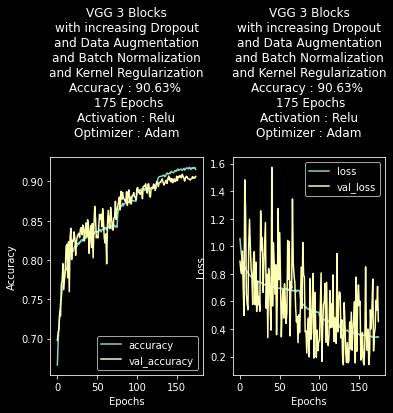

In [0]:
y = [y for y in range(175)]


plt.subplot(1,2,1)
plt.plot(y, history['accuracy'][:175], label='accuracy')
plt.plot(y, history['val_accuracy'][:175], label='val_accuracy')
plt.title('VGG 3 Blocks\nwith increasing Dropout\nand Data Augmentation\nand Batch Normalization\nand Kernel Regularization\nAccuracy : 90.63% \n 175 Epochs\nActivation : Relu\nOptimizer : Adam\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=0)

plt.subplot(1,2,2)
plt.plot(y, history['loss'][:175], label='loss')
plt.plot(y, history['val_loss'][:175], label='val_loss')
plt.title('VGG 3 Blocks\nwith increasing Dropout\nand Data Augmentation\nand Batch Normalization\nand Kernel Regularization\nAccuracy : 90.63% \n 175 Epochs\nActivation : Relu\nOptimizer : Adam\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc=0)

plt.show()